In [1]:
import numpy as np
from spec_tools import Photometry
import matplotlib.pyplot as plt
import fsps

In [2]:
def load_phot(fl):
    Pwv, Pflx, Perr, Pnum=np.load(fl)
    return Pwv[Pflx > 0], Pflx[Pflx > 0], Perr[Pflx > 0], Pnum[Pflx > 0].astype(int)

In [3]:
Pwv, Pflx, Perr, Pnum=load_phot('3dHST_photometry/UDS_28707_phot.npy')

<ErrorbarContainer object of 3 artists>

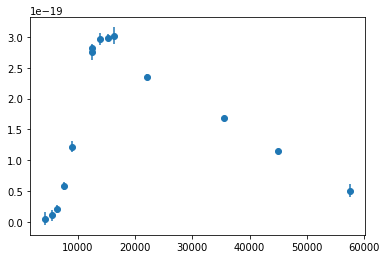

In [4]:
plt.errorbar(Pwv, Pflx, Perr, fmt = 'o')

In [5]:
sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh=4, 
                            tau=0.2, dust_type=1) 

In [6]:
wave,flux = sp.get_spectrum(tage = 5, peraa=True)

In [18]:
PHOT = {}

for i, filt in enumerate(Pnum):
    PHOT[filt] = Photometry([1],[1],np.ones_like(flux), filt)
    PHOT[filt].Get_Sensitivity(filt)


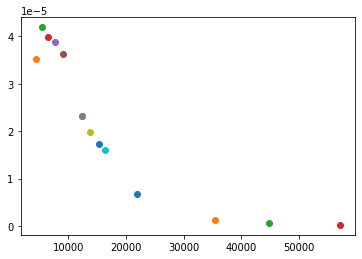

In [19]:
for i, filt in enumerate(Pnum):
    PHOT[filt].Photo_model(wave,flux)
    plt.plot(PHOT[filt].eff_mwv, PHOT[filt].mphoto, 'o')